In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 40)
pd.set_option('display.float_format', '{:,.1f}'.format)

df = pd.read_csv('student_data.csv')

In [242]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_por', 'G2_por', 'G3_por', 'G1_mat',
       'G2_mat', 'G3_mat', 'przedmiot', 'G3_avg'],
      dtype='object')

In [243]:
df.duplicated(subset=df.columns[:-4]).sum()

np.int64(0)


### Informacje o danych w DataFrame `df`

Powyższy wynik funkcji `info()` przedstawia szczegółowe informacje o danych zawartych w DataFrame `df`. Oto kluczowe punkty:

1. **Rozmiar danych**: DataFrame zawiera 1044 wiersze i 37 kolumn.
2. **Typy danych**:
    - 16 kolumn zawiera dane typu `int64` (liczbowe wartości całkowite).
    - 18 kolumn zawiera dane typu `object` (ciągi znaków lub kategorie).
3. **Brakujące dane**: Wszystkie kolumny mają pełne dane (brak wartości `NaN` prócz tych, które oznaczając brak podjęcia danego przedmiotu).

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1005 non-null   object 
 1   sex         1005 non-null   object 
 2   age         1005 non-null   int64  
 3   address     1005 non-null   object 
 4   famsize     1005 non-null   object 
 5   Pstatus     1005 non-null   object 
 6   Medu        1005 non-null   int64  
 7   Fedu        1005 non-null   int64  
 8   Mjob        1005 non-null   object 
 9   Fjob        1005 non-null   object 
 10  reason      1005 non-null   object 
 11  guardian    1005 non-null   object 
 12  traveltime  1005 non-null   int64  
 13  studytime   1005 non-null   int64  
 14  failures    1005 non-null   int64  
 15  schoolsup   1005 non-null   object 
 16  famsup      1005 non-null   object 
 17  paid        1005 non-null   object 
 18  activities  1005 non-null   object 
 19  nursery     1005 non-null  

## Podsumowanie statystyczne danych w DataFrame `df`

1. **Średnia (`mean`)**:
    - Średni wiek uczniów (`age`) wynosi około 16,74 lat.
    - Średnia liczba nieobecności (`absences`) to około 4,52.
    - Średnie oceny w poszczególnych okresach: `G1_por` - 11,40, `G2_por` - 11,57, `G3_por` - 11,91, `G1_mat` - 10,91, `G2_mat` - 10,71, `G3_mat` - 10,42.

2. **Odchylenie standardowe (`std`)**:
    - Wiek uczniów ma odchylenie standardowe wynoszące około 1,24, co wskazuje na niewielkie zróżnicowanie wieku.
    - Liczba nieobecności (`absences`) ma większe zróżnicowanie z odchyleniem standardowym wynoszącym około 6,28.
    - Oceny (`G1_por`, `G2_por`, `G3_por`, `G1_mat`, `G2_mat`, `G3_mat`) mają odchylenie standardowe w zakresie od 2,75 do 4,58.

3. **Wartości minimalne (`min`) i maksymalne (`max`)**:
    - Wiek uczniów waha się od 15 do 22 lat.
    - Liczba nieobecności wynosi od 0 do 75.
    - Oceny w poszczególnych okresach mieszczą się w zakresie od 0 do 20.

4. **Percentyle (`25%`, `50%`, `75%`)**:
    - Mediana wieku (`50%`) wynosi 17 lat.
    - Mediana liczby nieobecności to 2.
    - Mediana ocen:
        - `G1_por` - 11, `G2_por` - 11, `G3_por` - 12,
        - `G1_mat` - 11, `G2_mat` - 11, `G3_mat` - 11.

In [245]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
age,"1,005.0",16.7,1.2,15.0,16.0,17.0,18.0,22.0
Medu,"1,005.0",2.6,1.1,0.0,2.0,3.0,4.0,4.0
Fedu,"1,005.0",2.4,1.1,0.0,1.0,2.0,3.0,4.0
traveltime,"1,005.0",1.5,0.7,1.0,1.0,1.0,2.0,4.0
studytime,"1,005.0",2.0,0.8,1.0,1.0,2.0,2.0,4.0
failures,"1,005.0",0.3,0.7,0.0,0.0,0.0,0.0,3.0
famrel,"1,005.0",3.9,0.9,1.0,4.0,4.0,5.0,5.0
freetime,"1,005.0",3.2,1.0,1.0,3.0,3.0,4.0,5.0
goout,"1,005.0",3.2,1.1,1.0,2.0,3.0,4.0,5.0
Dalc,"1,005.0",1.5,0.9,1.0,1.0,1.0,2.0,5.0


## Podsumowanie statystyczne danych typu `object` w DataFrame `df`

1. **Unikalne wartości (`unique`)**:
    - `school`: 2 wartości (`GP` - Gabriel Pereira, `MS` - Mousinho da Silveira).
    - `sex`: 2 wartości (`F` - female, `M` - male).
    - `address`: 2 wartości (`U` - urban, `R` - rural).
    - `famsize`: 2 wartości (`LE3` - less or equal to 3, `GT3` - greater than 3).
    - `Pstatus`: 2 wartości (`T` - living together, `A` - apart).
    - `Mjob` i `Fjob`: różnorodne zawody, np. `at_home`, `teacher`, `other` (zawody rodziców).
    - `reason`: 4 wartości (`home` - close to home, `reputation` - school reputation, `course` - course preference, `other`).
    - `guardian`: 3 wartości (`mother`, `father`, `other` - opiekun ucznia).
    - `schoolsup`, `famsup`, `paid`, `activities`, `nursery`, `higher`, `internet`, `romantic`: 2 wartości (`yes`, `no`).
    - `przedmiot`: 3 wartości (`portugalski`, `matematyka`, `inne`).

2. **Najczęstsze wartości (`top`)**:
    - `school`: `GP` (740 wystąpień).
    - `sex`: `F` (571 wystąpień).
    - `address`: `U` (728 wystąpień).
    - `Pstatus`: `T` (887 wystąpień).
    - `Mjob`: `other` (380 wystąpień).
    - `Fjob`: `other` (565 wystąpień).
    - `guardian`: `mother` (707 wystąpień).
    - `schoolsup`: `no` (892 wystąpienia).
    - `famsup`: `yes` (624 wystąpienia).
    - `paid`: `no` (787 wystąpień).
    - `higher`: `yes` (916 wystąpień).
    - `internet`: `yes` (798 wystąpień).
    - `romantic`: `no` (645 wystąpień).
    - `przedmiot`: `portugalski` (610 wystąpień).


In [246]:
df.describe(include = 'object').transpose()

,count,unique,top,freq
school,1005,2,GP,740
sex,1005,2,F,571
address,1005,2,U,728
famsize,1005,2,GT3,712
Pstatus,1005,2,T,887
Mjob,1005,5,other,380
Fjob,1005,5,other,565
reason,1005,4,course,414
guardian,1005,3,mother,707
schoolsup,1005,2,no,892


In [247]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

G1_mat    610
G2_mat    610
G3_mat    610
G1_por    356
G2_por    356
G3_por    356
dtype: int64

In [248]:
df.nunique().sort_values(ascending = False)

absences      35
G3_avg        28
G3_mat        18
G1_mat        17
G2_mat        17
G1_por        17
G3_por        17
G2_por        16
age            8
famrel         5
Dalc           5
Walc           5
health         5
freetime       5
goout          5
Fjob           5
Mjob           5
Fedu           5
Medu           5
failures       4
studytime      4
reason         4
traveltime     4
guardian       3
przedmiot      3
school         2
romantic       2
internet       2
higher         2
sex            2
activities     2
paid           2
famsup         2
schoolsup      2
Pstatus        2
famsize        2
address        2
nursery        2
dtype: int64

<Figure size 1000x1000 with 0 Axes>

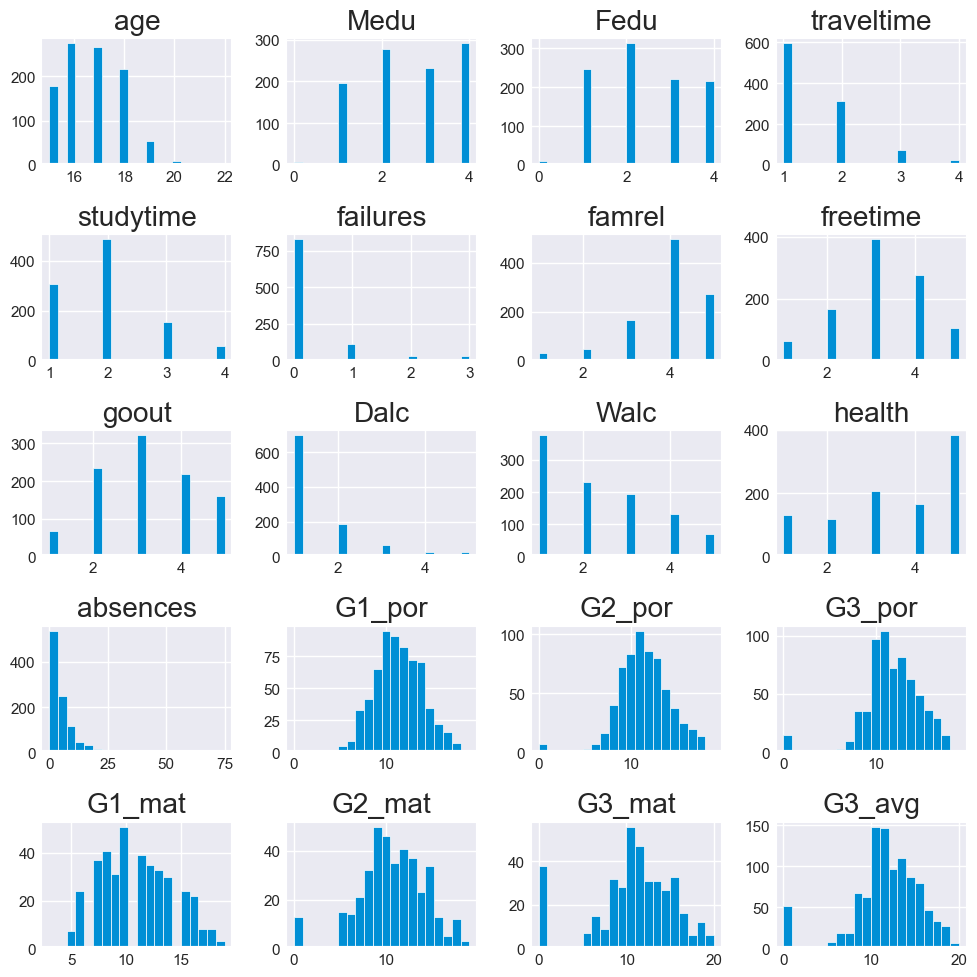

In [249]:
plt.figure(figsize=(10, 10))
df.hist(bins=20, figsize=(10, 10))
plt.tight_layout()
plt.show()

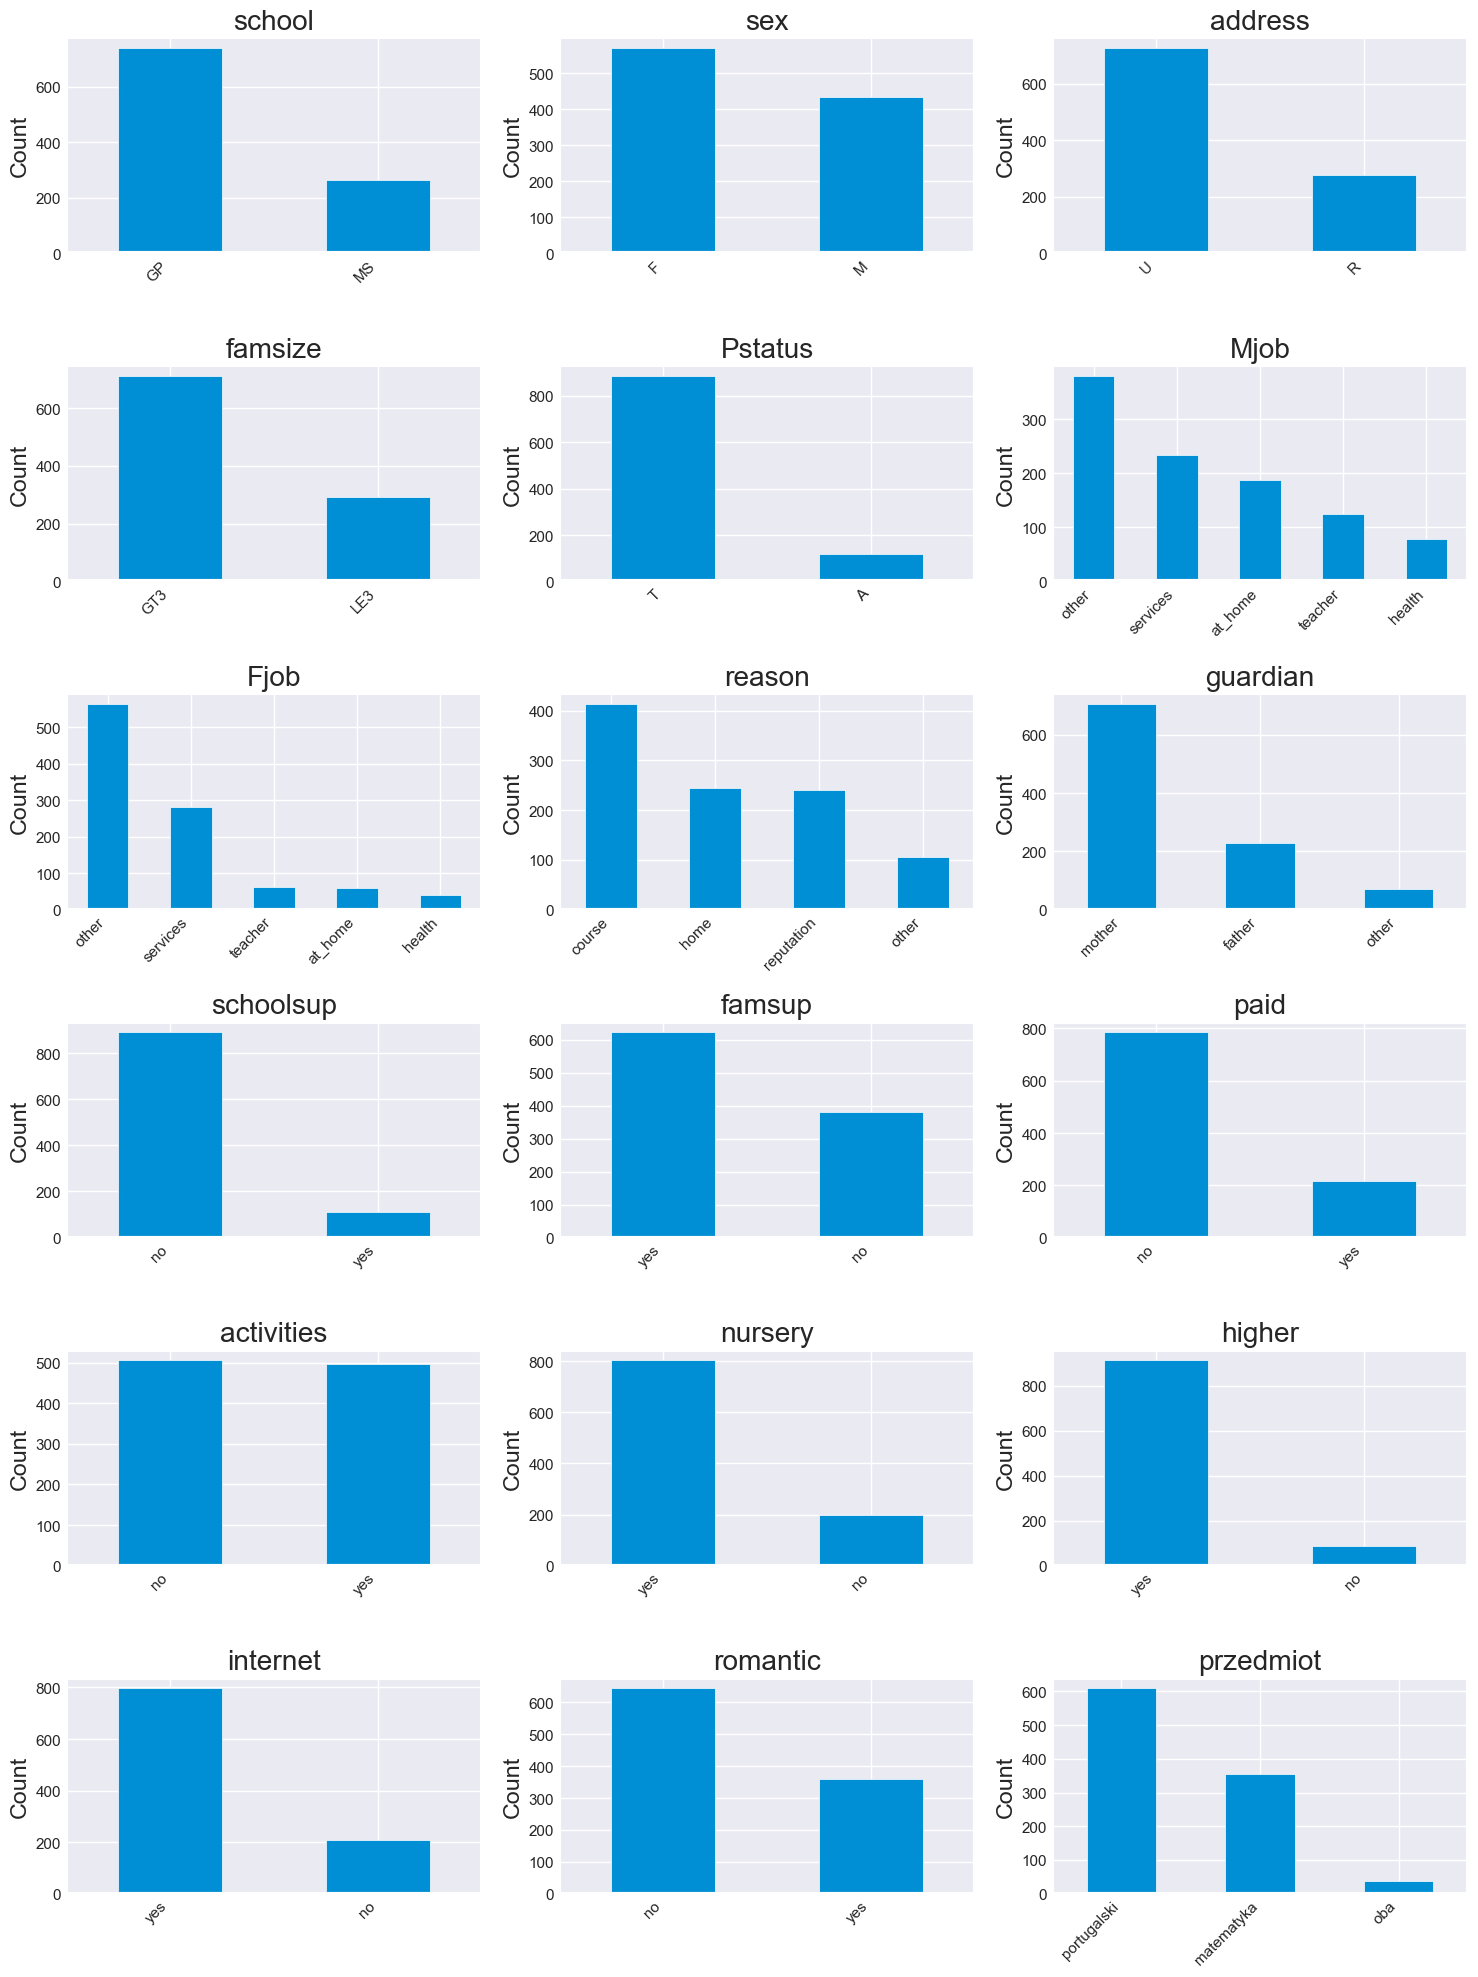

In [250]:
object_columns = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20)) 
axes = axes.flatten()

for i, column in enumerate(object_columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i], title=column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), ha='right')
    axes[i].set_xlabel('')

for j in range(len(object_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


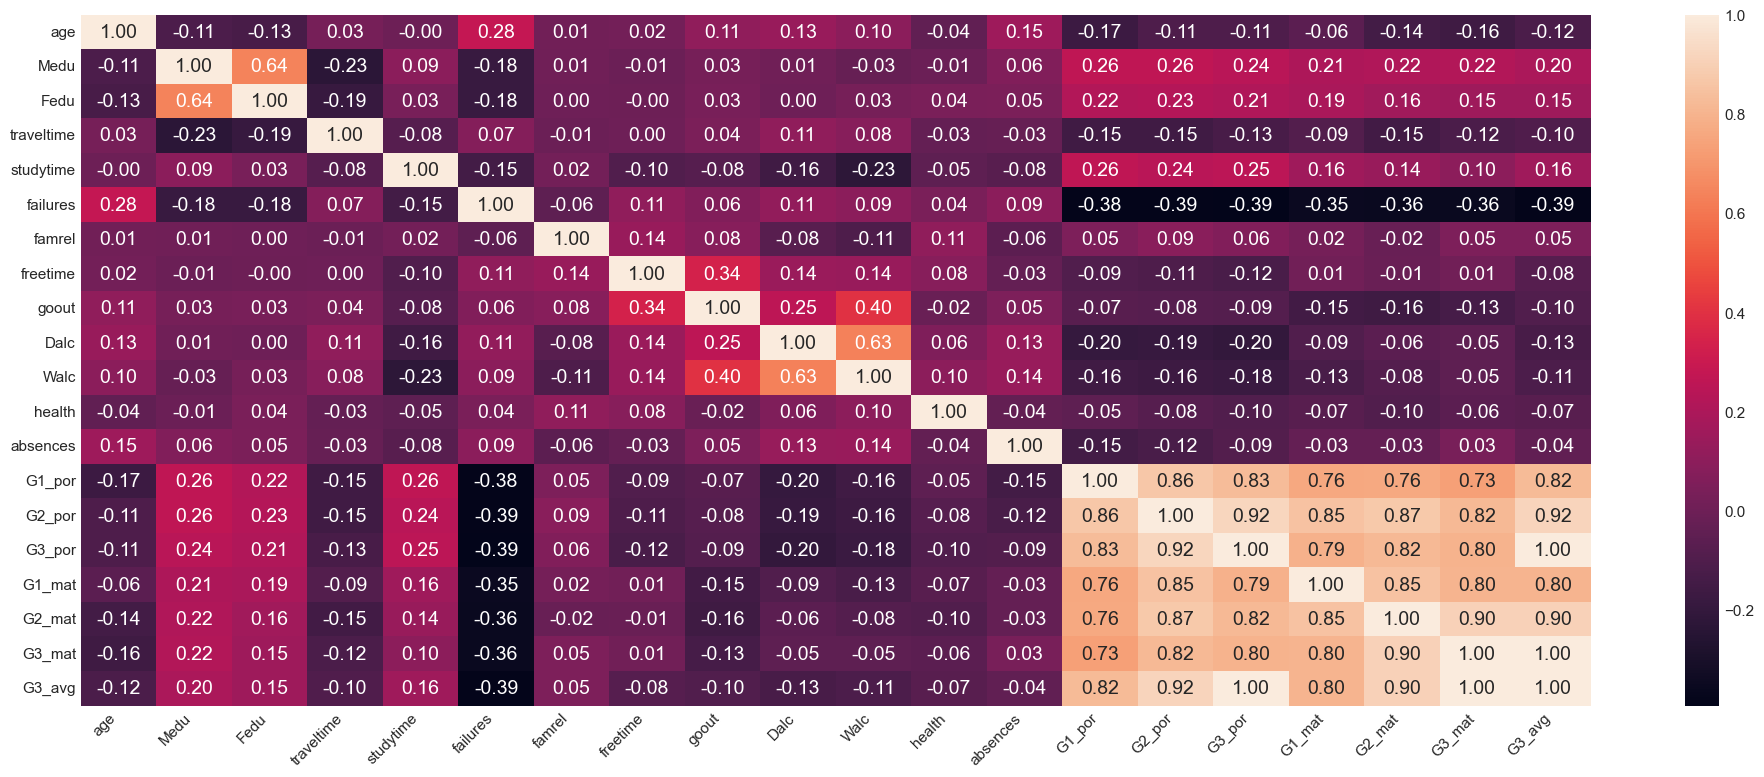

In [251]:
df_corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(df_corr, annot=True, fmt='.2f')

plt.rcParams['figure.figsize'] = (20, 8)
plt.xticks(rotation=45, ha ='right')
plt.tight_layout()
plt.show()

In [252]:
pd.crosstab(df['G3_avg'], df['sex'])

sex,F,M
G3_avg,,
0.0,29,22
1.0,0,1
4.0,1,0
5.0,3,5
6.0,14,4
7.0,11,8
8.0,34,33
9.0,30,31
9.5,1,0


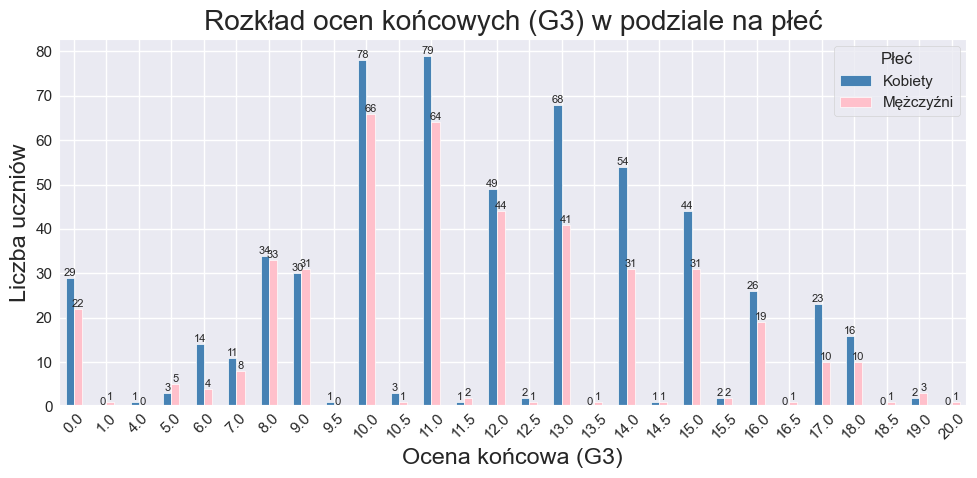

In [253]:
ax = pd.crosstab(df['G3_avg'], df['sex']).plot(kind='bar', figsize=(10, 5), color=['steelblue', 'pink'], legend=True)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)
    
plt.title('Rozkład ocen końcowych (G3) w podziale na płeć')
plt.xlabel('Ocena końcowa (G3)')
plt.ylabel('Liczba uczniów')
plt.legend(title='Płeć', labels=['Kobiety', 'Mężczyźni'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: >

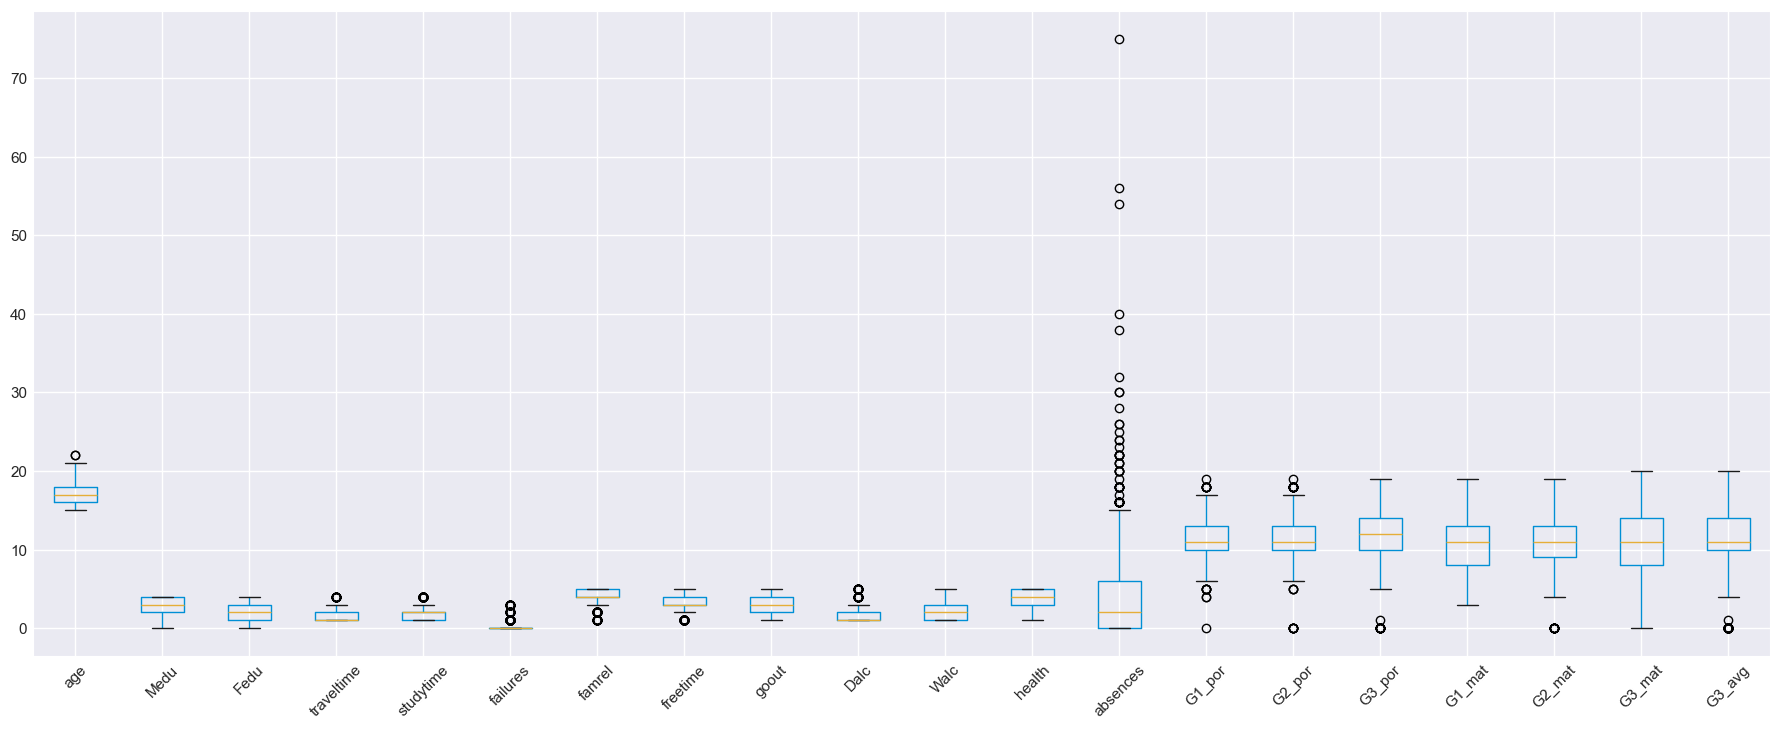

In [254]:
df.boxplot(figsize=(20, 8), rot=45)

In [255]:
numeric_cols = df.select_dtypes(include=['number']).columns
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

# Wyświetlenie liczby outlierów dla każdej zmiennej
for col, outlier_values in outliers.items():
    print(f"{col}: {len(outlier_values)} wartości odstające")

age: 2 wartości odstające
Medu: 0 wartości odstające
Fedu: 0 wartości odstające
traveltime: 24 wartości odstające
studytime: 60 wartości odstające
failures: 178 wartości odstające
famrel: 76 wartości odstające
freetime: 63 wartości odstające
goout: 0 wartości odstające
Dalc: 52 wartości odstające
Walc: 0 wartości odstające
health: 0 wartości odstające
absences: 54 wartości odstające
G1_por: 16 wartości odstające
G2_por: 25 wartości odstające
G3_por: 16 wartości odstające
G1_mat: 0 wartości odstające
G2_mat: 13 wartości odstające
G3_mat: 0 wartości odstające
G3_avg: 52 wartości odstające


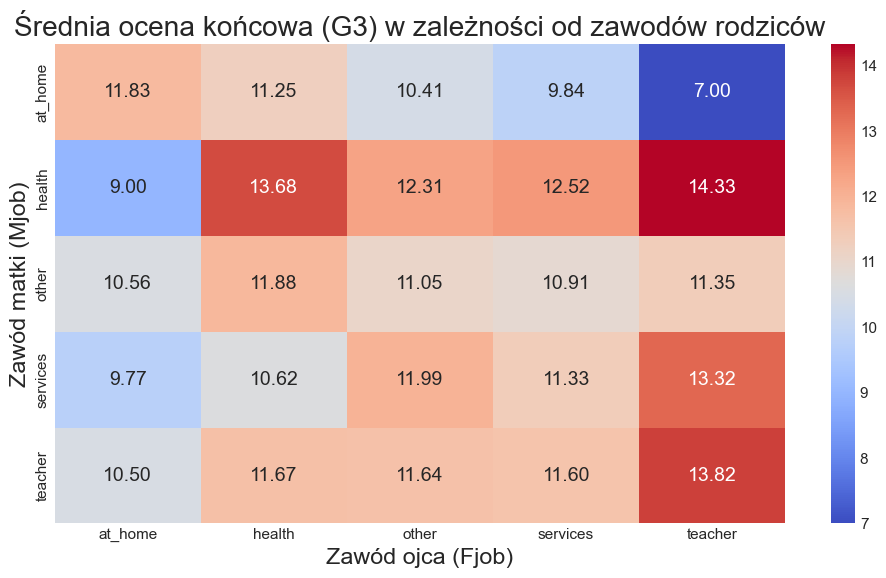

In [256]:
heatmap_data = df.groupby(['Mjob', 'Fjob'])['G3_avg'].mean().round(2).unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Średnia ocena końcowa (G3) w zależności od zawodów rodziców')
plt.xlabel('Zawód ojca (Fjob)')
plt.ylabel('Zawód matki (Mjob)')
plt.tight_layout()
plt.show()


Dane w `heatmap_data` przedstawiają średnie końcowe oceny uczniów (`G3`) w zależności od zawodów rodziców (`Mjob` - matki, `Fjob` - ojca). Oto kluczowe wnioski:

1. **Najwyższe średnie oceny**:
    - Uczniowie, których ojcowie są nauczycielami (`teacher`), a matki pracują w zawodach związanych ze zdrowiem (`health`), osiągają najwyższe średnie oceny końcowe (14.33).
    - Podobnie wysokie wyniki osiągają uczniowie, których oboje rodzice są nauczycielami (13.82).

2. **Najniższe średnie oceny**:
    - Najniższe średnie oceny (7.00) mają uczniowie, których matki są gospodyniami domowymi (`at_home`), a ojcowie nauczycielami (`teacher`).

3. **Ogólne trendy**:
    - Zawody związane z edukacją (`teacher`) i zdrowiem (`health`) rodziców są związane z wyższymi średnimi ocenami uczniów.
    - Uczniowie, których rodzice pracują w zawodach wymagających mniejszego zaangażowania w edukację (np. `at_home`), mają niższe średnie oceny.

Warto zauważyć, że dane te mogą wskazywać na wpływ środowiska rodzinnego i zawodowego rodziców na wyniki edukacyjne uczniów. 

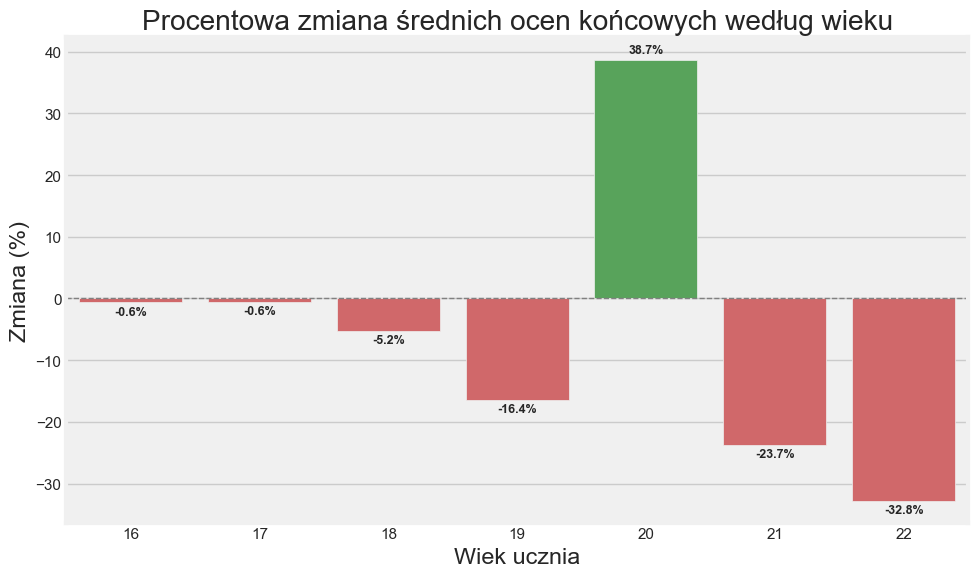

In [257]:
df_age_grouped = df.groupby('age')['G3_avg'].mean()
pct_change = df_age_grouped.pct_change().dropna() * 100
age_labels = df_age_grouped.index[1:].tolist()

plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
bar_colors = ['#4CAF50' if val > 0 else '#e15759' for val in pct_change]
ax = sns.barplot(x=age_labels, y=pct_change, palette=bar_colors)

for i, val in enumerate(pct_change):
    ax.text(i, val + (0.5 if val > 0 else -0.5), 
            f"{val:.1f}%", ha='center', 
            va='bottom' if val > 0 else 'top',
            fontsize=9, weight='bold')

plt.title("Procentowa zmiana średnich ocen końcowych według wieku")
plt.xlabel("Wiek ucznia")
plt.ylabel("Zmiana (%)")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [258]:
df['G3_avg'].agg(['mean', 'median', 'std', 'min', 'max'])

mean     11.3
median   11.0
std       3.9
min       0.0
max      20.0
Name: G3_avg, dtype: float64

In [259]:
df['Result'] = np.where(df['G3_avg'] >= df['G3_avg'].median(), '1', '0')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1_por,G2_por,G3_por,G1_mat,G2_mat,G3_mat,przedmiot,G3_avg,Result
0,GP,F,15,R,GT3,T,1,1,at_home,other,home,mother,2,4,0,yes,yes,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,4,13.0,13.0,13.0,NaN,NaN,NaN,portugalski,13.0,1
1,GP,F,15,R,GT3,T,1,1,at_home,other,home,mother,2,4,1,yes,yes,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,2,NaN,NaN,NaN,7.0,10.0,10.0,matematyka,10.0,0
2,GP,F,15,R,GT3,T,1,1,other,other,course,mother,3,1,1,no,no,no,yes,yes,yes,yes,yes,5,5,5,1,1,1,2,8.0,9.0,9.0,NaN,NaN,NaN,portugalski,9.0,0
3,GP,F,15,R,GT3,T,1,1,other,other,reputation,mother,1,2,0,yes,yes,no,no,no,yes,yes,yes,3,3,4,2,4,5,2,13.0,11.0,11.0,NaN,NaN,NaN,portugalski,11.0,1
4,GP,F,15,R,GT3,T,1,1,other,other,reputation,mother,1,2,2,yes,yes,no,no,no,yes,yes,yes,3,3,4,2,4,5,2,NaN,NaN,NaN,8.0,6.0,5.0,matematyka,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,MS,M,19,U,GT3,T,3,2,at_home,services,course,mother,2,1,3,no,no,no,yes,yes,yes,no,no,3,2,1,1,1,3,4,6.0,11.0,9.0,NaN,NaN,NaN,portugalski,9.0,0
1001,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,NaN,NaN,NaN,8.0,9.0,9.0,matematyka,9.0,0
1002,MS,M,20,R,GT3,T,1,1,other,other,course,other,2,1,1,no,yes,no,no,yes,no,yes,yes,4,4,3,2,4,4,12,8.0,11.0,10.0,NaN,NaN,NaN,portugalski,10.0,0
1003,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,NaN,NaN,NaN,9.0,9.0,9.0,matematyka,9.0,0


---

# Podział danych

In [261]:
X = df.drop(columns=['G3_avg', 'Result'])
y = df['Result']
X = pd.get_dummies(X, drop_first=True)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [263]:
print(f"X: {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X: (1005, 47)
X_train shape: (603, 47)
X_val shape: (301, 47)
X_test shape: (101, 47)


In [264]:
X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)